# Log Data Analysis

In [1]:
import os
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

In [2]:
# Set current working directory
# Get the directory of the current notebook
notebook_dir = os.path.dirname(os.path.abspath("__file__"))

# Set the working directory to the project root (one level up from the notebook directory)
project_root = os.path.join(notebook_dir, os.pardir)
os.chdir(project_root)

# You can verify the new working directory
print(f"Current Working Directory: {os.getcwd()}")

Current Working Directory: /home/timpi/Projects/thesis/multi_agent_supply_chain_optimization


### 1- Import data

In [3]:
# Define the path to the CSV file
file_path = 'benchmark/CFLP/cflp_benchmark_10cust_10fac.csv'
df = pd.read_csv(file_path)
print(f"Successfully read {file_path}")

Successfully read benchmark/CFLP/cflp_benchmark_10cust_10fac.csv


### 2- Basic Statistics

In [4]:
df.head()

,run_id,timestamp,status,objective_value,model_file_path,model_data_path,parameters,constraints,variables,pulp_model_execution_time,modification,scenario_text,scenario_type
0,cflp_bench_20250531_143720_1,2025-05-31T14:37:20.366817,Optimal,436.071875,models/CFLP/capfacloc_model.py,models/CFLP/data/capfacloc_data_10cust_10fac.json,"{""demands"": [15.15, 32, 9, 35, 33, 29, 15, 9, ...","{""Demand_0"": ""Serve_0_0 + Serve_0_1 + Serve_0_...","{""Open_0"": 0.0, ""Open_1"": 1.0, ""Open_2"": 0.0, ...",0.002908,"{""ADD DATA"": ""demands[0] = demands[0] * (1 + 1...",What if demand at customer 0 changed by 1%?,demand-change-customer-pct
1,cflp_bench_20250531_143720_2,2025-05-31T14:37:20.369332,Optimal,436.081250,models/CFLP/capfacloc_model.py,models/CFLP/data/capfacloc_data_10cust_10fac.json,"{""demands"": [15.3, 32, 9, 35, 33, 29, 15, 9, 1...","{""Demand_0"": ""Serve_0_0 + Serve_0_1 + Serve_0_...","{""Open_0"": 0.0, ""Open_1"": 1.0, ""Open_2"": 0.0, ...",0.002614,"{""ADD DATA"": ""demands[0] = demands[0] * (1 + 2...",What if demand at customer 0 changed by 2%?,demand-change-customer-pct
2,cflp_bench_20250531_143720_3,2025-05-31T14:37:20.372329,Optimal,436.090625,models/CFLP/capfacloc_model.py,models/CFLP/data/capfacloc_data_10cust_10fac.json,"{""demands"": [15.450000000000001, 32, 9, 35, 33...","{""Demand_0"": ""Serve_0_0 + Serve_0_1 + Serve_0_...","{""Open_0"": 0.0, ""Open_1"": 1.0, ""Open_2"": 0.0, ...",0.002175,"{""ADD DATA"": ""demands[0] = demands[0] * (1 + 3...",What if demand at customer 0 changed by 3%?,demand-change-customer-pct
3,cflp_bench_20250531_143720_5,2025-05-31T14:37:20.418930,Optimal,436.109375,models/CFLP/capfacloc_model.py,models/CFLP/data/capfacloc_data_10cust_10fac.json,"{""demands"": [15.75, 32, 9, 35, 33, 29, 15, 9, ...","{""Demand_0"": ""Serve_0_0 + Serve_0_1 + Serve_0_...","{""Open_0"": 0.0, ""Open_1"": 1.0, ""Open_2"": 0.0, ...",0.013654,"{""ADD DATA"": ""demands[0] = demands[0] * (1 + 5...",What if demand at customer 0 changed by 5%?,demand-change-customer-pct
4,cflp_bench_20250531_143720_12,2025-05-31T14:37:20.429809,Optimal,436.175000,models/CFLP/capfacloc_model.py,models/CFLP/data/capfacloc_data_10cust_10fac.json,"{""demands"": [16.8, 32, 9, 35, 33, 29, 15, 9, 1...","{""Demand_0"": ""Serve_0_0 + Serve_0_1 + Serve_0_...","{""Open_0"": 0.0, ""Open_1"": 1.0, ""Open_2"": 0.0, ...",0.002629,"{""ADD DATA"": ""demands[0] = demands[0] * (1 + 1...",What if demand at customer 0 changed by 12%?,demand-change-customer-pct


In [5]:
print("\nDataFrame Info:")
df.info()

print("\nDataFrame Description:")
df.describe()

# Analyze the 'status' column
if 'status' in df.columns:
    print("\nStatus Value Counts:")
    print(df['status'].value_counts())

# Analyze the 'objective_value' column
if 'objective_value' in df.columns:
    print("\nObjective Value Analysis:")
    print(f"Mean: {df['objective_value'].mean()}")
    print(f"Median: {df['objective_value'].median()}")
    print(f"Min: {df['objective_value'].min()}")
    print(f"Max: {df['objective_value'].max()}")


DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7912 entries, 0 to 7911
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   run_id                     7912 non-null   object 
 1   timestamp                  7912 non-null   object 
 2   status                     7912 non-null   object 
 3   objective_value            7912 non-null   float64
 4   model_file_path            7912 non-null   object 
 5   model_data_path            7912 non-null   object 
 6   parameters                 7912 non-null   object 
 7   constraints                7912 non-null   object 
 8   variables                  7912 non-null   object 
 9   pulp_model_execution_time  7912 non-null   float64
 10  modification               7912 non-null   object 
 11  scenario_text              7912 non-null   object 
 12  scenario_type              7912 non-null   object 
dtypes: float64(2), object(11)
memor

### 3- Actual Analysis

In [6]:
# Example of accessing and parsing the 'parameters' column (assuming it's a JSON string)
if 'parameters' in df.columns:
    print("\nFirst row parameters:")
    try:
        first_params = json.loads(df['parameters'].iloc[0])
        print(first_params)
    except json.JSONDecodeError:
        print("Could not parse parameters as JSON for the first row.")


First row parameters:
{'demands': [15.15, 32, 9, 35, 33, 29, 15, 9, 18, 15], 'capacities': [98, 115, 87, 98, 105, 99, 118, 118, 83, 104], 'fixed_costs': [173, 154, 181, 157, 152, 155, 167, 169, 190, 195], 'transportation_costs': [[19, 17, 11, 13, 11, 19, 19, 14, 19, 17], [16, 18, 15, 16, 16, 10, 15, 11, 14, 14], [17, 13, 10, 14, 18, 12, 11, 14, 14, 12], [19, 11, 11, 13, 17, 19, 12, 10, 15, 16], [19, 13, 19, 14, 10, 13, 19, 14, 17, 14], [19, 10, 13, 11, 17, 10, 11, 13, 15, 12], [15, 15, 12, 12, 19, 16, 12, 13, 12, 19], [11, 19, 15, 13, 14, 16, 11, 16, 15, 15], [19, 16, 15, 13, 13, 18, 12, 15, 15, 12], [19, 19, 17, 17, 16, 10, 12, 15, 13, 13]], 'n_customers': 10, 'n_facilities': 10}


In [7]:
# Initialize lists to store all extracted parameters
all_demands = []
all_capacities = []
all_fixed_costs = []
all_transportation_costs = []

# Iterate through each row and extract parameters
for index, row in df.iterrows():
    try:
        parameters = json.loads(row['parameters'])
        if 'demands' in parameters:
            all_demands.extend(parameters['demands'])
        if 'capacities' in parameters:
            all_capacities.extend(parameters['capacities'])
        if 'fixed_costs' in parameters:
            all_fixed_costs.extend(parameters['fixed_costs'])
        if 'transportation_costs' in parameters:
            # Flatten the list of lists for transportation costs
            for sublist in parameters['transportation_costs']:
                all_transportation_costs.extend(sublist)

    except json.JSONDecodeError:
        print(f"Warning: Could not parse JSON in row {index}")
    except KeyError as e:
        print(f"Warning: Missing key {e} in parameters for row {index}")

# Perform analysis on the collected parameters
print("\nAnalysis of Parameters Across All Scenarios:")

if all_demands:
    print("\nDemands:")
    print(f"  Average: {np.mean(all_demands)}")
    print(f"  Minimum: {np.min(all_demands)}")
    print(f"  Maximum: {np.max(all_demands)}")

if all_capacities:
    print("\nCapacities:")
    print(f"  Average: {np.mean(all_capacities)}")
    print(f"  Minimum: {np.min(all_capacities)}")
    print(f"  Maximum: {np.max(all_capacities)}")

if all_fixed_costs:
    print("\nFixed Costs:")
    print(f"  Average: {np.mean(all_fixed_costs)}")
    print(f"  Minimum: {np.min(all_fixed_costs)}")
    print(f"  Maximum: {np.max(all_fixed_costs)}")

if all_transportation_costs:
    print("\nTransportation Costs:")
    print(f"  Average: {np.mean(all_transportation_costs)}")
    print(f"  Minimum: {np.min(all_transportation_costs)}")
    print(f"  Maximum: {np.max(all_transportation_costs)}")


Analysis of Parameters Across All Scenarios:

Demands:
  Average: 21.065659757330636
  Minimum: 5.0
  Maximum: 52.5

Capacities:
  Average: 102.48704499494438
  Minimum: 66.4
  Maximum: 141.6

Fixed Costs:
  Average: 169.33674165824064
  Minimum: 121.60000000000001
  Maximum: 234.0

Transportation Costs:
  Average: 14.54063953488372
  Minimum: 8.0
  Maximum: 22.8


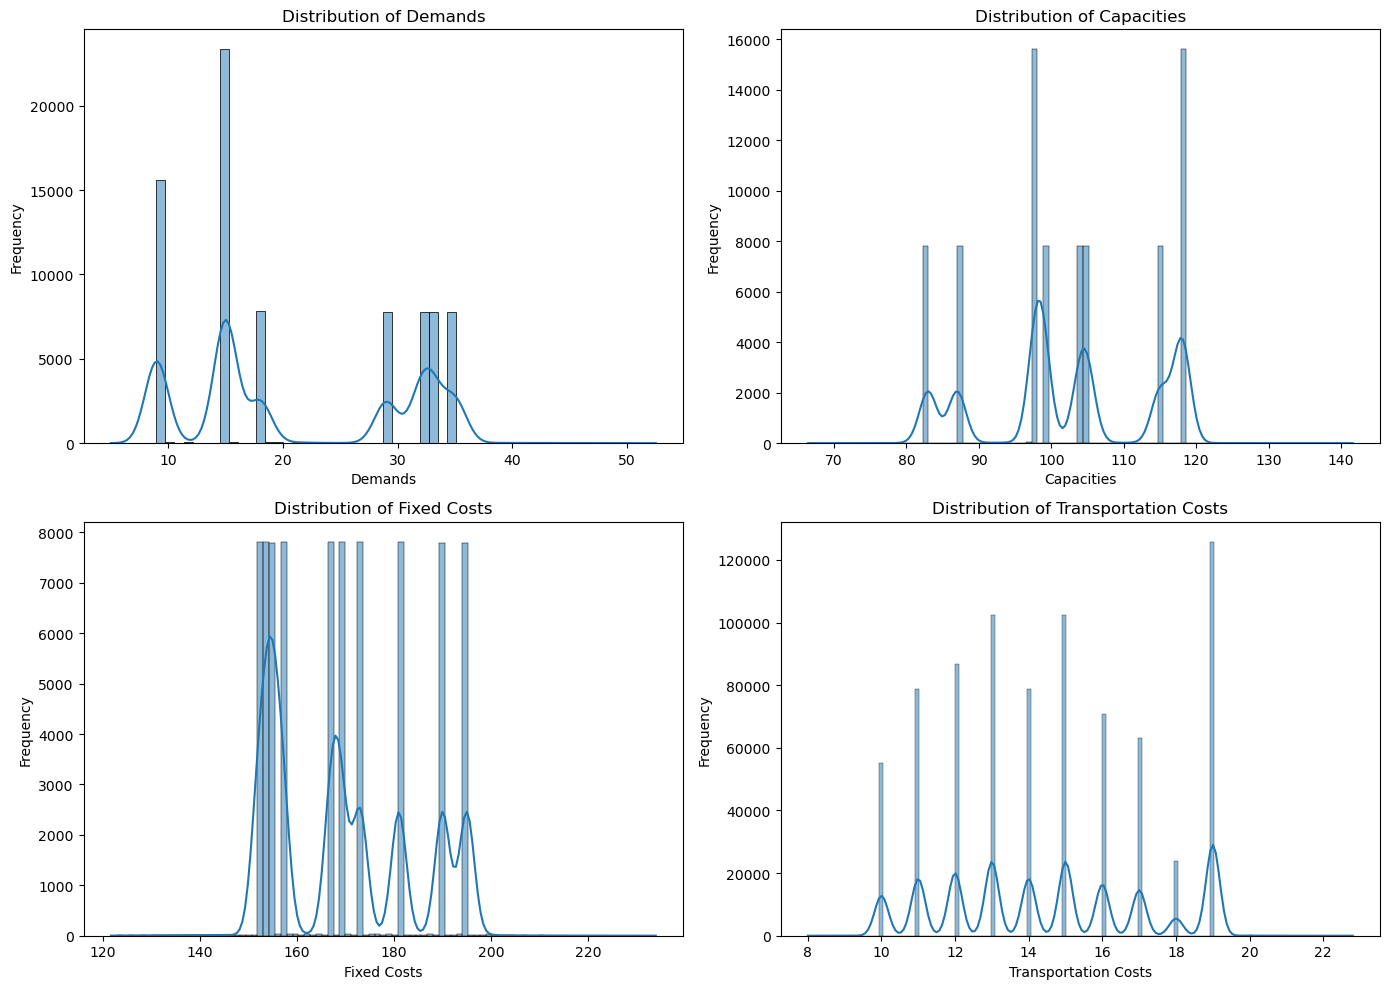

In [8]:
# Create plots for each parameter type
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten() # Flatten the 2x2 grid of axes for easy iteration

plot_data = {
    'Demands': all_demands,
    'Capacities': all_capacities,
    'Fixed Costs': all_fixed_costs,
    'Transportation Costs': all_transportation_costs
}

for i, (param_name, data) in enumerate(plot_data.items()):
    if data:
        sns.histplot(data, kde=True, ax=axes[i])
        axes[i].set_title(f'Distribution of {param_name}')
        axes[i].set_xlabel(param_name)
        axes[i].set_ylabel('Frequency')
    else:
        axes[i].set_title(f'No data available for {param_name}')
        axes[i].text(0.5, 0.5, 'No data', horizontalalignment='center', verticalalignment='center', transform=axes[i].transAxes)


plt.tight_layout()
plt.show()

In [9]:
# Initialize lists to store parameter values and corresponding objective values
demands_obj = []
capacities_obj = []
fixed_costs_obj = []
transportation_costs_obj = []

# Iterate through each row, extract parameters and objective value
for index, row in df.iterrows():
    try:
        parameters = json.loads(row['parameters'])
        objective_value = row['objective_value']

        if 'demands' in parameters:
            for demand in parameters['demands']:
                demands_obj.append((demand, objective_value))

        if 'capacities' in parameters:
            for capacity in parameters['capacities']:
                capacities_obj.append((capacity, objective_value))

        if 'fixed_costs' in parameters:
            for fixed_cost in parameters['fixed_costs']:
                fixed_costs_obj.append((fixed_cost, objective_value))

        if 'transportation_costs' in parameters:
            for row_costs in parameters['transportation_costs']:
                for cost in row_costs:
                    transportation_costs_obj.append((cost, objective_value))

    except json.JSONDecodeError:
        print(f"Warning: Could not parse JSON in row {index}")
    except KeyError as e:
        print(f"Warning: Missing key {e} in parameters for row {index}")


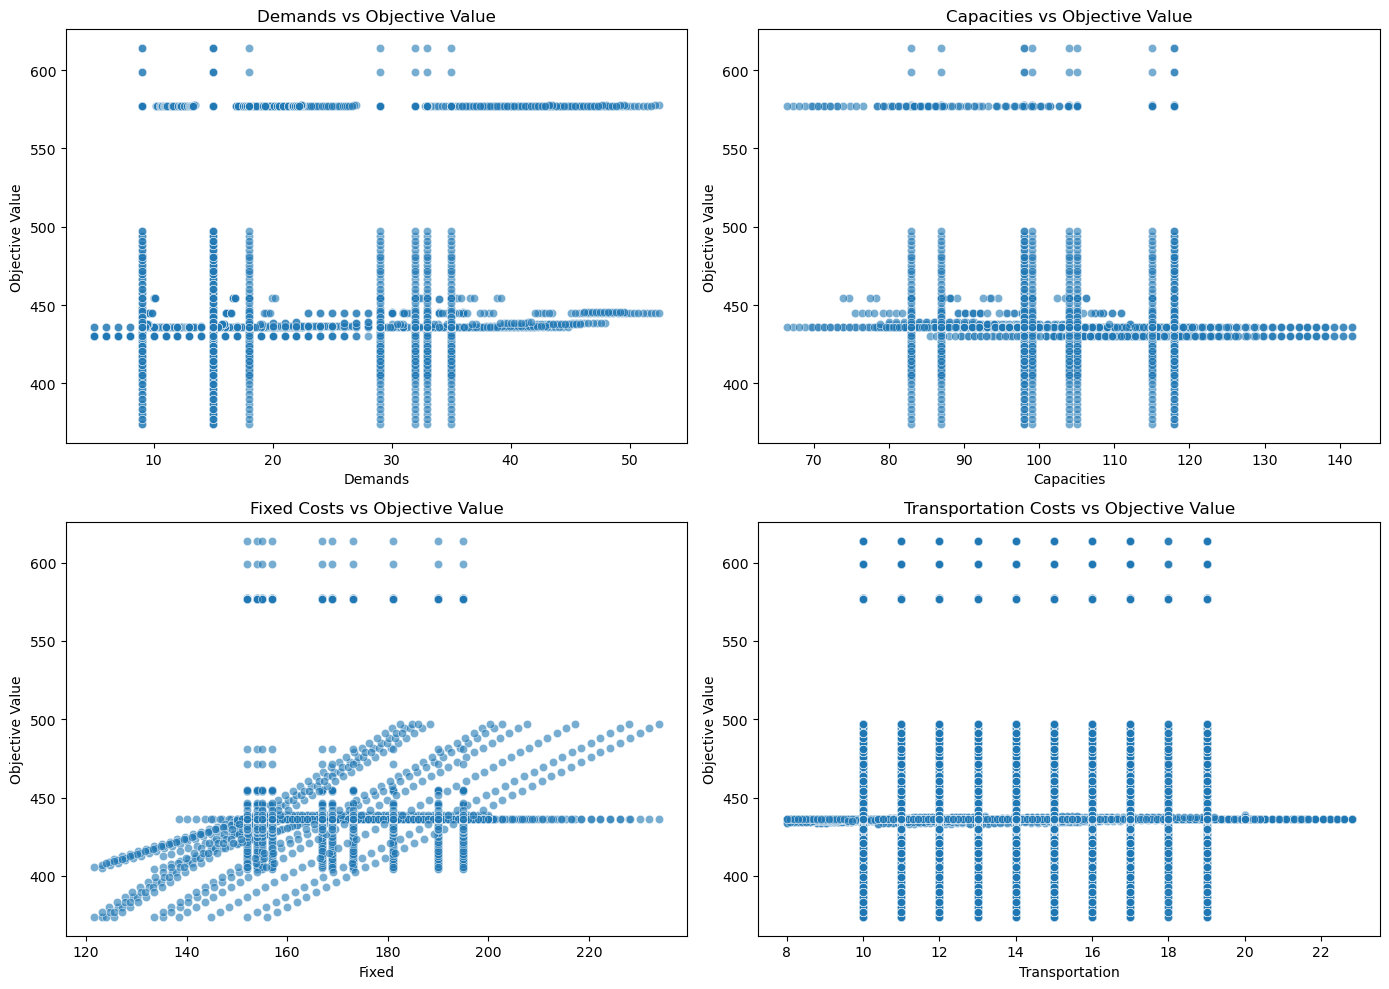

In [10]:
# Separate x and y values for plotting
demands_x, demands_y = zip(*demands_obj) if demands_obj else ([], [])
capacities_x, capacities_y = zip(*capacities_obj) if capacities_obj else ([], [])
fixed_costs_x, fixed_costs_y = zip(*fixed_costs_obj) if fixed_costs_obj else ([], [])
transportation_costs_x, transportation_costs_y = zip(*transportation_costs_obj) if transportation_costs_obj else ([], [])


# Create scatter plots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

plot_data = {
    'Demands vs Objective Value': (demands_x, demands_y),
    'Capacities vs Objective Value': (capacities_x, capacities_y),
    'Fixed Costs vs Objective Value': (fixed_costs_x, fixed_costs_y),
    'Transportation Costs vs Objective Value': (transportation_costs_x, transportation_costs_y)
}

for i, (plot_title, (x_data, y_data)) in enumerate(plot_data.items()):
    if x_data and y_data:
        sns.scatterplot(x=list(x_data), y=list(y_data), ax=axes[i], alpha=0.6)
        axes[i].set_title(plot_title)
        axes[i].set_xlabel(plot_title.split(' ')[0]) # Extract parameter name for x-label
        axes[i].set_ylabel('Objective Value')
    else:
        axes[i].set_title(f'No data available for {plot_title}')
        axes[i].text(0.5, 0.5, 'No data', horizontalalignment='center', verticalalignment='center', transform=axes[i].transAxes)


plt.tight_layout()
plt.show()

In [11]:
# Initialize dictionaries to store parameter values and corresponding objective values for each specific parameter
demands_data = {}
capacities_data = {}
fixed_costs_data = {}
transportation_costs_data = {}

# Iterate through each row, extract parameters and objective value
for index, row in df.iterrows():
    try:
        parameters = json.loads(row['parameters'])
        objective_value = row['objective_value']

        if 'demands' in parameters:
            for i, demand in enumerate(parameters['demands']):
                param_name = f'demand_{i}'
                if param_name not in demands_data:
                    demands_data[param_name] = []
                demands_data[param_name].append((demand, objective_value))

        if 'capacities' in parameters:
            for i, capacity in enumerate(parameters['capacities']):
                param_name = f'capacity_{i}'
                if param_name not in capacities_data:
                    capacities_data[param_name] = []
                capacities_data[param_name].append((capacity, objective_value))

        if 'fixed_costs' in parameters:
            for i, fixed_cost in enumerate(parameters['fixed_costs']):
                param_name = f'fixed_cost_{i}'
                if param_name not in fixed_costs_data:
                    fixed_costs_data[param_name] = []
                fixed_costs_data[param_name].append((fixed_cost, objective_value))

        if 'transportation_costs' in parameters:
            for i, row_costs in enumerate(parameters['transportation_costs']):
                for j, cost in enumerate(row_costs):
                    param_name = f'transportation_cost_{i}_{j}'
                    if param_name not in transportation_costs_data:
                        transportation_costs_data[param_name] = []
                    transportation_costs_data[param_name].append((cost, objective_value))

    except json.JSONDecodeError:
        print(f"Warning: Could not parse JSON in row {index}")
    except KeyError as e:
        print(f"Warning: Missing key {e} in parameters for row {index}")

# Function to create and display scatter plots for a given parameter type
def plot_individual_parameters(data_dict, param_type_name):
    print(f"\nGenerating plots for {param_type_name}...")
    for param_name, data in data_dict.items():
        if data:
            x_data, y_data = zip(*data)
            plt.figure(figsize=(8, 6))
            sns.scatterplot(x=list(x_data), y=list(y_data), alpha=0.6)
            plt.title(f'{param_name.replace("_", " ").title()} vs Objective Value')
            plt.xlabel(param_name.replace("_", " ").title())
            plt.ylabel('Objective Value')
            plt.grid(True)
            plt.show()
        else:
            print(f"No data available for {param_name}")

In [ ]:
# Generate plots for each parameter type
# plot_individual_parameters(demands_data, 'Demands')
# plot_individual_parameters(capacities_data, 'Capacities')
# plot_individual_parameters(fixed_costs_data, 'Fixed Costs')
# plot_individual_parameters(transportation_costs_data, 'Transportation Costs')

### 4- Solution Space Analysis

#### 4.1 Sobol Data

In [27]:
sobol_file_path = 'results/sobol_sample.csv'
sobol_df = pd.read_csv(sobol_file_path)
print(f"Successfully read {sobol_file_path}")

sobol_df.head()

Successfully read results/sobol_sample.csv


,demand_0,demand_1,demand_2,demand_3,demand_4,capacity_0,capacity_1,capacity_2,capacity_3,capacity_4,...,transp_cost_3_2,transp_cost_3_3,transp_cost_3_4,transp_cost_4_0,transp_cost_4_1,transp_cost_4_2,transp_cost_4_3,transp_cost_4_4,objective_value,variables
0,5.005676,13.266541,12.865417,29.705017,26.953918,90.300293,85.310059,112.380371,102.653809,96.14502,...,18.013306,15.786743,13.876343,16.184692,11.863403,13.204956,15.037231,18.010864,242.435303,"{'Open_0': 0.0, 'Open_1': 0.0, 'Open_2': 0.0, ..."
1,24.028748,13.266541,12.865417,29.705017,26.953918,90.300293,85.310059,112.380371,102.653809,96.14502,...,18.013306,15.786743,13.876343,16.184692,11.863403,13.204956,15.037231,18.010864,264.820557,"{'Open_0': 0.0, 'Open_1': 0.0, 'Open_2': 1.0, ..."
2,5.005676,28.138367,12.865417,29.705017,26.953918,90.300293,85.310059,112.380371,102.653809,96.14502,...,18.013306,15.786743,13.876343,16.184692,11.863403,13.204956,15.037231,18.010864,264.820557,"{'Open_0': 0.0, 'Open_1': 0.0, 'Open_2': 1.0, ..."
3,5.005676,13.266541,6.455017,29.705017,26.953918,90.300293,85.310059,112.380371,102.653809,96.14502,...,18.013306,15.786743,13.876343,16.184692,11.863403,13.204956,15.037231,18.010864,242.435303,"{'Open_0': 0.0, 'Open_1': 0.0, 'Open_2': 0.0, ..."
4,5.005676,13.266541,12.865417,29.356873,26.953918,90.300293,85.310059,112.380371,102.653809,96.14502,...,18.013306,15.786743,13.876343,16.184692,11.863403,13.204956,15.037231,18.010864,242.435303,"{'Open_0': 0.0, 'Open_1': 0.0, 'Open_2': 0.0, ..."


Binary decision variables: ['Open_0', 'Open_1', 'Open_2', 'Open_3', 'Open_4']


/tmp/ipykernel_68716/2413623513.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_probs = sobol_df.groupby('bin')[bin_cols].mean()


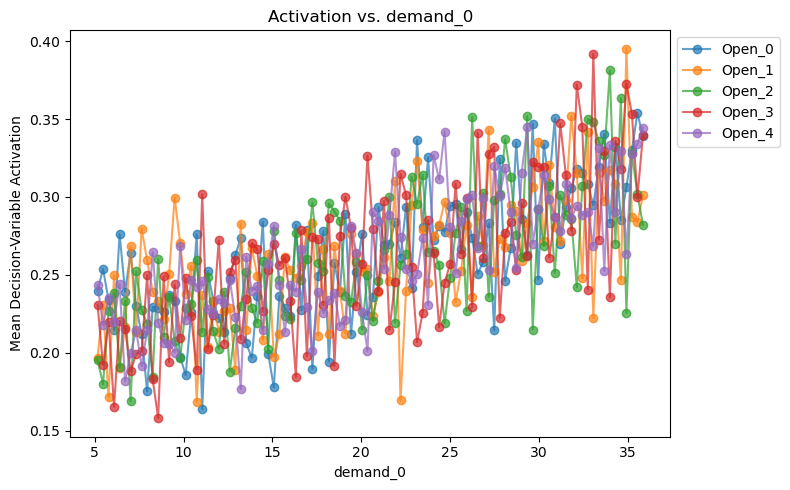

In [28]:
import ast

# 2. Parse the 'variables' JSON-like column
sobol_df['var_dict'] = sobol_df['variables'].apply(ast.literal_eval)
vars_df = pd.json_normalize(sobol_df['var_dict'])
sobol_df = pd.concat([sobol_df.drop(columns=['variables', 'var_dict']), vars_df], axis=1)

# 3. Identify binary decision variables
bin_cols = [c for c in vars_df.columns if set(vars_df[c].dropna().unique()) <= {0,1}]
print("Binary decision variables:", bin_cols)

# 7. Activation‐Probability vs. Parameter
param = 'demand_0'   # choose any expanded column: demand_i, capacity_j, fcost_k, or tcost_l
n_bins = 100
sobol_df['bin'] = pd.qcut(sobol_df[param], q=n_bins, duplicates='drop')

# mean activation per bin
bin_probs = sobol_df.groupby('bin')[bin_cols].mean()
midpoints = [(iv.left+iv.right)/2 for iv in bin_probs.index.categories]

plt.figure(figsize=(8,5))
for col in bin_probs.columns:
    plt.plot(midpoints, bin_probs[col], marker='o', alpha=0.7, label=col)
plt.xlabel(param)
plt.ylabel('Mean Decision‐Variable Activation')
plt.title(f'Activation vs. {param}')
plt.legend(bbox_to_anchor=(1,1))
plt.tight_layout()
plt.show()

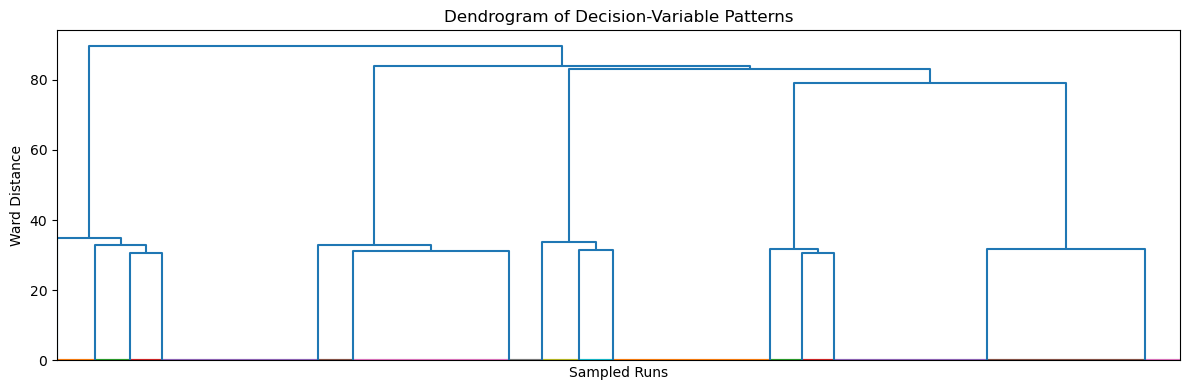

In [37]:
# Hierarchical clustering of decision patterns to detect regime shifts
# Use a subset of runs to avoid memory issues if large
sample_df = vars_df[bin_cols].sample(n=min(len(vars_df), 20000), random_state=42) #total 344044 runs
Z = linkage(sample_df, method='ward')

# Dendrogram
plt.figure(figsize=(12, 4))
dendrogram(Z, no_labels=True, color_threshold=0.5)
plt.title('Dendrogram of Decision-Variable Patterns')
plt.xlabel('Sampled Runs')
plt.ylabel('Ward Distance')
plt.tight_layout()
plt.show()

In [38]:
# 7. Cluster Assignment & Summary
labels = fcluster(Z, t=3, criterion='maxclust')
cluster_map = dict(zip(sample_df.index, labels))
sobol_df['cluster'] = sobol_df.index.map(cluster_map).fillna(-1).astype(int)
cluster_summary = sobol_df.groupby('cluster')[param].agg(
    count='count', min_val='min', max_val='max', mean_val='mean'
).reset_index()

cluster_summary

,cluster,count,min_val,max_val,mean_val
0,-1,324064,5.001892,35.998108,20.502266
1,1,4649,5.017029,35.994324,21.010399
2,2,3985,5.001892,35.982971,20.322267
3,3,11366,5.005676,35.998108,20.288951


#### 4.2 Agent Data

Successfully read utils_main_run_log.csv


/tmp/ipykernel_68716/1583673169.py:51: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_probs = df.groupby('bin')[bin_cols].mean()


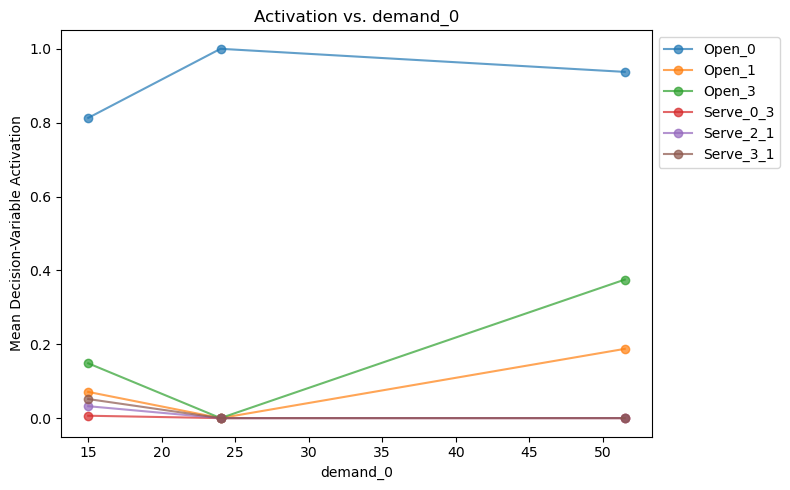

In [ ]:
# Define the path to the CSV file
file_path = 'utils_main_run_log.csv'
df = pd.read_csv(file_path)
print(f"Successfully read {file_path}")

# 2. Parse parameter JSON
parsed = df['parameters'].apply(json.loads)

# 3. Generic expanders for list and matrix with padding
def expand_list_series(srs, prefix):
    lists = srs.tolist()
    maxlen = max(len(lst) for lst in lists)
    data = {
        f"{prefix}_{i}": [lst[i] if i < len(lst) else np.nan for lst in lists]
        for i in range(maxlen)
    }
    return pd.DataFrame(data)

def expand_matrix_series(srs, prefix):
    mats = srs.tolist()
    flat = [np.array(m).flatten().tolist() for m in mats]
    maxlen = max(len(f) for f in flat)
    data = {
        f"{prefix}_{i}": [f[i] if i < len(f) else np.nan for f in flat]
        for i in range(maxlen)
    }
    return pd.DataFrame(data)

# 4. Flatten each group
dem_df = expand_list_series(parsed.map(lambda p: p['demands']),       'demand')
cap_df = expand_list_series(parsed.map(lambda p: p['capacities']),    'capacity')
fc_df  = expand_list_series(parsed.map(lambda p: p['fixed_costs']),   'fixed_cost')
tc_df  = expand_matrix_series(parsed.map(lambda p: p['transportation_costs']), 'transp_cost')

# 5. Merge expanded parameters back
params_expanded = pd.concat([dem_df, cap_df, fc_df, tc_df], axis=1)
df = pd.concat([df.drop(columns=['parameters']), params_expanded], axis=1)

# 6. Extract binary decision variables
vars_parsed = df['variables'].apply(json.loads)
vars_df     = pd.json_normalize(vars_parsed)
bin_cols    = [c for c in vars_df.columns if set(vars_df[c].dropna().unique()) <= {0,1}]
df = pd.concat([df.drop(columns=['variables']), vars_df[bin_cols]], axis=1)

# 7. Activation‐Probability vs. Parameter
param = 'demand_0'   # choose any expanded column: demand_i, capacity_j, fcost_k, or tcost_l
n_bins = 10
df['bin'] = pd.qcut(df[param], q=n_bins, duplicates='drop')

# mean activation per bin
bin_probs = df.groupby('bin')[bin_cols].mean()
midpoints = [(iv.left+iv.right)/2 for iv in bin_probs.index.categories]

plt.figure(figsize=(8,5))
for col in bin_probs.columns:
    plt.plot(midpoints, bin_probs[col], marker='o', alpha=0.7, label=col)
plt.xlabel(param)
plt.ylabel('Mean Decision‐Variable Activation')
plt.title(f'Activation vs. {param}')
plt.legend(bbox_to_anchor=(1,1))
plt.tight_layout()
plt.show()

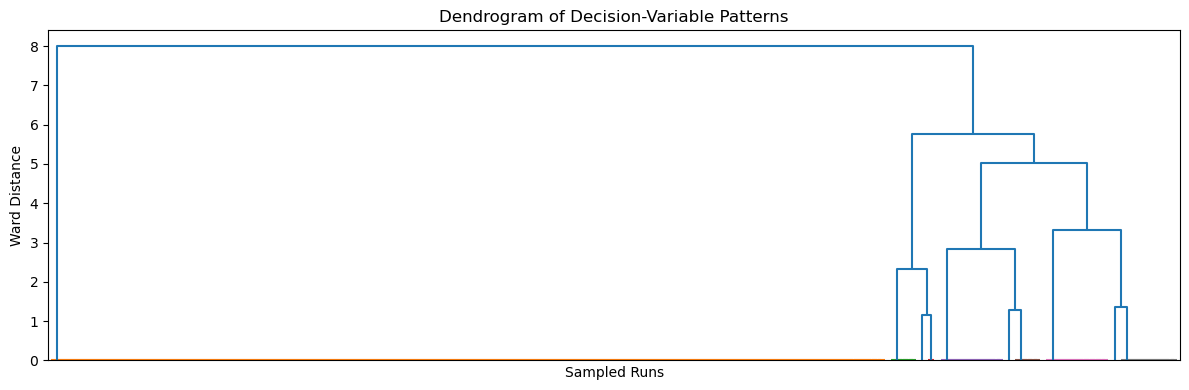

In [13]:
# Hierarchical clustering of decision patterns to detect regime shifts
# Use a subset of runs to avoid memory issues if large
sample_df = vars_df[bin_cols].sample(n=min(len(vars_df), 1000), random_state=42)
Z = linkage(sample_df, method='ward')

# Dendrogram
plt.figure(figsize=(12, 4))
dendrogram(Z, no_labels=True, color_threshold=0.5)
plt.title('Dendrogram of Decision-Variable Patterns')
plt.xlabel('Sampled Runs')
plt.ylabel('Ward Distance')
plt.tight_layout()
plt.show()

In [17]:
# 8. Assign clusters and relate back to parameter values
cluster_labels = fcluster(Z, t=3, criterion='maxclust')
# Map labels back to the sampled indices
sampled_indices = sample_df.index
df_clusters = pd.DataFrame({
    'run_index': sampled_indices,
    'cluster': cluster_labels
})
# Merge cluster labels into df_bin
df['cluster'] = df.index.map(df_clusters.set_index('run_index')['cluster'])

# Summarize cluster ranges for the parameter
cluster_summary = df.groupby('cluster')[param].agg(
    count='count',
    min_param='min',
    max_param='max',
    mean_param='mean'
).reset_index()

cluster_summary.head()

,cluster,count,min_param,max_param,mean_param
0,1,135,10.0,75.0,22.444444
1,2,8,20.0,20.0,20.000000
2,3,39,16.0,50.0,23.358974


#### 4.3 Agent Sensitivity Analysis Flow

In [4]:
# Define the path to the CSV file
file_path = 'logs/run_log_20250524_224911.csv' # 'logs/run_log_20250522_182914.csv'
log_df = pd.read_csv(file_path)
print(f"Successfully read {file_path}")

Successfully read logs/run_log_20250524_224911.csv


##### 4.3.1 Some Statistics

In [5]:
# Parse the token_usage JSON column
log_df['token_dict'] = log_df['token_usage'].apply(json.loads)

# Extract planner and coder token counts
log_df['planner_total_tokens']    = log_df['token_dict'].apply(lambda d: d.get('planner', {}).get('total', 0))
log_df['planner_prompt_tokens']   = log_df['token_dict'].apply(lambda d: d.get('planner', {}).get('prompt', 0))
log_df['planner_completion_tokens'] = log_df['token_dict'].apply(lambda d: d.get('planner', {}).get('completion', 0))
log_df['planner_total_cost']    = log_df['token_dict'].apply(lambda d: d.get('planner', {}).get('total_cost', 0))
log_df['coder_total_tokens']      = log_df['token_dict'].apply(lambda d: d.get('coder', {}).get('total', 0))
log_df['coder_prompt_tokens']     = log_df['token_dict'].apply(lambda d: d.get('coder', {}).get('prompt', 0))
log_df['coder_completion_tokens'] = log_df['token_dict'].apply(lambda d: d.get('coder', {}).get('completion', 0))
log_df['coder_total_cost']    = log_df['token_dict'].apply(lambda d: d.get('coder', {}).get('total_cost', 0))

# Compute run-level metrics
metrics = {
    'Number of Runs': len(log_df),
    'Total Planner Tokens': log_df['planner_total_tokens'].sum(),
    'Total Planner Prompt Tokens': log_df['planner_prompt_tokens'].sum(),
    'Total Planner Completion Tokens': log_df['planner_completion_tokens'].sum(),
    'Total Planner Cost in USD': log_df['planner_total_cost'].sum(),
    'Total Coder Tokens': log_df['coder_total_tokens'].sum(),
    'Total Coder Prompt Tokens': log_df['coder_prompt_tokens'].sum(),
    'Total Coder Completion Tokens': log_df['coder_completion_tokens'].sum(),
    'Total Coder Cost in USD': log_df['coder_total_cost'].sum(),
    'Total Tokens (Planner + Coder)': log_df['planner_total_tokens'].sum() + log_df['coder_total_tokens'].sum(),
    'Total Cost in USD (Planner + Coder)': log_df['planner_total_cost'].sum() + log_df['coder_total_cost'].sum(),
    'Minimum Objective Value': log_df['objective_value'].min(),
    'Average Objective Value': log_df['objective_value'].mean(),
    'Maximum Objective Value': log_df['objective_value'].max(),
    'Average ΔObj': log_df['delta_obj'].mean()
}

# Display the metrics as a DataFrame
metrics_df = pd.DataFrame.from_dict(metrics, orient='index', columns=['Value'])

metrics_df

,Value
Number of Runs,5.000000
Total Planner Tokens,7306.000000
Total Planner Prompt Tokens,7226.000000
Total Planner Completion Tokens,80.000000
Total Planner Cost in USD,0.000853
Total Coder Tokens,8430.000000
Total Coder Prompt Tokens,8330.000000
Total Coder Completion Tokens,100.000000
Total Coder Cost in USD,0.012225
Total Tokens (Planner + Coder),15736.000000


In [6]:
# Basic statistics for some numerical columns
numeric_cols = ['pulp_model_execution_time', 'agent_execution_time']
print(log_df[numeric_cols].describe())


       pulp_model_execution_time  agent_execution_time
count                   5.000000              5.000000
mean                    0.002735              1.395540
std                     0.001209              0.121598
min                     0.001771              1.301500
25%                     0.002084              1.337600
50%                     0.002275              1.361900
75%                     0.002741              1.368800
max                     0.004805              1.607900


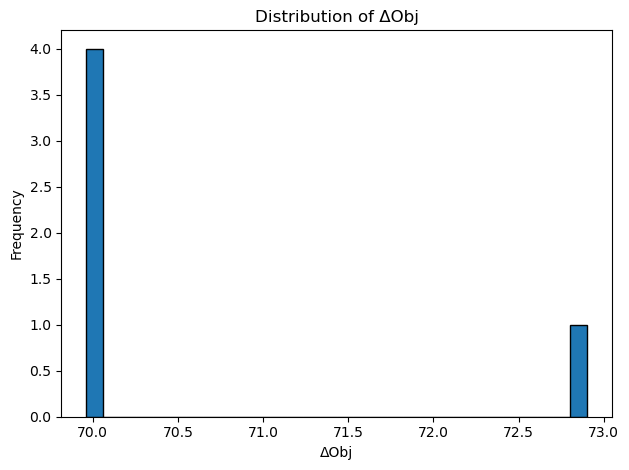

In [7]:
# 1. Distribution of ΔObj
plt.figure()
plt.hist(log_df['delta_obj'], bins=30, edgecolor='black')
plt.title('Distribution of ΔObj')
plt.xlabel('ΔObj')
plt.ylabel('Frequency')
plt.tight_layout()

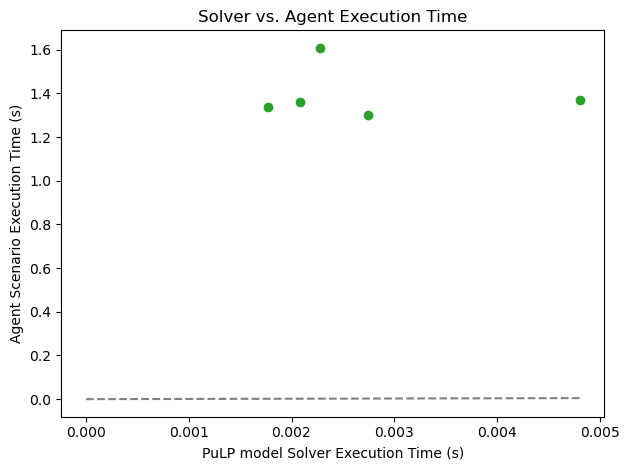

In [8]:
# 5. Solver vs. Agent Execution Time
plt.figure()
plt.scatter(log_df['pulp_model_execution_time'], log_df['agent_execution_time'], c='tab:green')
plt.title('Solver vs. Agent Execution Time')
plt.xlabel('PuLP model Solver Execution Time (s)')
plt.ylabel('Agent Scenario Execution Time (s)')
plt.plot([0, log_df['pulp_model_execution_time'].max()],
         [0, log_df['pulp_model_execution_time'].max()], 'k--', alpha=0.5)
plt.tight_layout()

##### 4.3.2 Scenarios

In [9]:
# Parse the code_modification JSON column
log_df['code_mod_dict'] = log_df['code_modification'].apply(json.loads)

# Extract modification type and code snippet
log_df['mod_type'] = log_df['code_mod_dict'].apply(lambda d: list(d.keys())[0] if isinstance(d, dict) and d else None)
log_df['mod_code'] = log_df['code_mod_dict'].apply(lambda d: list(d.values())[0] if isinstance(d, dict) and d else None)

# Build the summary DataFrame
summary_df = log_df[['scenario_text', 'mod_type', 'mod_code', 'delta_obj']].rename(columns={
    'scenario_text': 'Scenario',
    'mod_type': 'Modification Type',
    'mod_code': 'Code Modification',
    'delta_obj': 'ΔObj'
})

summary_df

,Scenario,Modification Type,Code Modification,ΔObj
0,Limit the capacity of facility 5 (index 4) to 50.,ADD DATA,capacities[4] = 50,72.9000
1,Limit the capacity of facility 3 (index 2) to 40.,ADD DATA,capacities[2] = 40,69.9625
2,Limit the capacity of facility 1 (index 0) to 50.,ADD DATA,capacities[0] = 50,69.9625
3,Limit the capacity of facility 6 (index 5) to 70.,ADD DATA,capacities[5] = 70,69.9625
4,Limit the capacity of facility 8 (index 7) to 40.,ADD DATA,capacities[7] = 40,69.9625


In [10]:
summary_df['Scenario']

0    Limit the capacity of facility 5 (index 4) to 50.
1    Limit the capacity of facility 3 (index 2) to 40.
2    Limit the capacity of facility 1 (index 0) to 50.
3    Limit the capacity of facility 6 (index 5) to 70.
4    Limit the capacity of facility 8 (index 7) to 40.
Name: Scenario, dtype: object

##### Checking JSON correctness

In [11]:
# Correctness metrics
# 1. JSON parseable
def is_json(s):
    try:
        json.loads(s)
        return True
    except:
        return False

log_df['json_parseable'] = log_df['code_modification'].apply(is_json)

# 2. Key correctness
log_df['key_correct'] = log_df['mod_type'].isin(['ADD DATA', 'ADD CONSTRAINT'])

# 3. Execution success
# Parse execution_result JSON/dict
def parse_exec(r):
    try:
        return json.loads(r) if isinstance(r, str) else r
    except:
        return {}

# Consider success if status is in expected list
success_statuses = ['Optimal', 'Not Solved', 'Infeasible']
log_df['exec_success'] = log_df['status'].isin(success_statuses)

# Compile correctness summary
correctness_summary = {
    'JSON Parseable Rate': log_df['json_parseable'].mean(),
    'Key Correctness Rate': log_df['key_correct'].mean(),
    'Execution Success Rate': log_df['exec_success'].mean(),
    'True Infeasibility Rate': (log_df['status'] == 'Infeasible').mean()
}
correctness_df = pd.DataFrame.from_dict(correctness_summary, orient='index', columns=['Rate'])

correctness_df

,Rate
JSON Parseable Rate,1.0
Key Correctness Rate,1.0
Execution Success Rate,1.0
True Infeasibility Rate,0.0


##### Efficiency

In [12]:
# Efficiency metrics
# Compute LLM overhead
log_df['llm_overhead_sec'] = log_df['agent_execution_time'] - log_df['pulp_model_execution_time']

efficiency_summary = {
    'Avg Scenario Time (s)': log_df['agent_execution_time'].mean(),
    'Avg Solver Time (s)': log_df['pulp_model_execution_time'].mean(),
    'Avg LLM Overhead (s)': log_df['llm_overhead_sec'].mean(),
    'Scenarios per Minute': 60 / log_df['agent_execution_time'].mean(),
    'Avg Planner Tokens': log_df['planner_total_tokens'].mean(),
    'Avg Coder Tokens': log_df['coder_total_tokens'].mean(),
    'Avg Planner Cost (USD)': log_df['planner_total_cost'].mean(),
    'Avg Coder Cost (USD)': log_df['coder_total_cost'].mean(),
    'Cost-Impact Ratio (USD per |ΔObj|)': (log_df['planner_total_cost'] + log_df['coder_total_cost']).sum() / log_df['delta_obj'].abs().sum()
}
efficiency_df = pd.DataFrame.from_dict(efficiency_summary, orient='index', columns=['Value'])

efficiency_df

,Value
Avg Scenario Time (s),1.395540
Avg Solver Time (s),0.002735
Avg LLM Overhead (s),1.392805
Scenarios per Minute,42.994110
Avg Planner Tokens,1461.200000
Avg Coder Tokens,1686.000000
Avg Planner Cost (USD),0.000171
Avg Coder Cost (USD),0.002445
Cost-Impact Ratio (USD per |ΔObj|),0.000037


##### Quality

In [13]:
# Quality metrics
# Impact threshold (e.g., 5% of baseline)
baseline = 366.1
threshold = 0.05 * baseline

quality_summary = {
    'Max |ΔObj|': log_df['delta_obj'].abs().max(),
    'High-Impact Rate (>5%)': (log_df['delta_obj'].abs() > threshold).mean(),
    'Infeasibility Rate': (log_df['status'] == 'Infeasible').mean(),
    'Unique Modification Types': log_df['mod_type'].nunique()
}
quality_df = pd.DataFrame.from_dict(quality_summary, orient='index', columns=['Value'])

quality_df

,Value
Max |ΔObj|,72.9
High-Impact Rate (>5%),1.0
Infeasibility Rate,0.0
Unique Modification Types,1.0


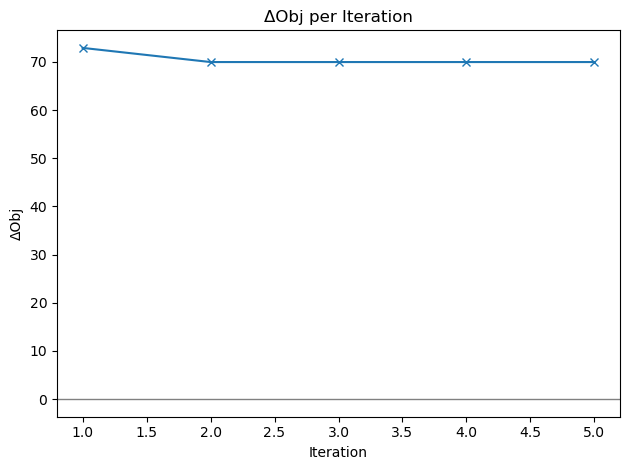

In [14]:
# Time Series: ΔObj over Iterations
plt.figure()
plt.plot(log_df.index+1, log_df['delta_obj'], marker='x')
plt.title('ΔObj per Iteration')
plt.xlabel('Iteration')
plt.ylabel('ΔObj')
plt.axhline(0, color='grey', linewidth=1)
plt.tight_layout()